In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import csv, glob, os, sys

plt.rcParams['xtick.labelsize'] = 15; plt.rcParams['ytick.labelsize'] = 15 #make size of axis tick labels larger

filename = 'freshest_hops.csv' # designate filename
rawdf = pd.read_table(filename, error_bad_lines=False, delimiter = ',') #read in file
print(rawdf)

        time    mq2    mq3    mq4    mq5    mq7  day  hop  alpha  beta
0     1155.2  0.900  1.630  0.625  0.350  1.135    4    1   12.3   3.6
1     1156.0  0.900  1.635  0.620  0.355  1.135    4    1   12.3   3.6
2     1156.8  0.900  1.640  0.620  0.355  1.135    4    1   12.3   3.6
3     1157.6  0.900  1.640  0.625  0.345  1.135    4    1   12.3   3.6
4     1158.4  0.905  1.630  0.615  0.340  1.135    4    1   12.3   3.6
5     1159.2  0.900  1.630  0.615  0.335  1.135    4    1   12.3   3.6
6     1160.0  0.905  1.635  0.625  0.340  1.135    4    1   12.3   3.6
7     1160.8  0.905  1.640  0.625  0.345  1.135    4    1   12.3   3.6
8     1161.6  0.905  1.635  0.620  0.340  1.135    4    1   12.3   3.6
9     1162.4  0.910  1.640  0.625  0.345  1.135    4    1   12.3   3.6
10    1163.3  0.905  1.635  0.625  0.345  1.135    4    1   12.3   3.6
11    1164.1  0.910  1.630  0.610  0.345  1.130    4    1   12.3   3.6
12    1164.9  0.910  1.635  0.625  0.345  1.125    4    1   12.3   3.6
13    

explained variance ratio (PCA): [ 0.96468282  0.031113    0.00420418]
explained variance ratio (LDA): [ 0.90767705  0.08090771  0.01141524]


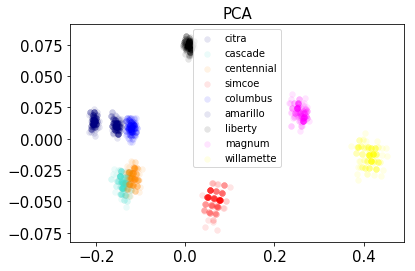

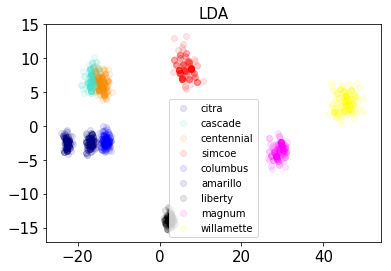

In [11]:
labels = np.array(rawdf['hop']) #set classes as labels

#df = rawdf.filter(['mq2', 'mq4', 'mq5', 'mq7'], axis=1)
#sensordata = df.values #matrix of sensor data


rawdf['mq2/mq7'] = np.divide(np.array(rawdf['mq2']),np.array(rawdf['mq7']))
rawdf['mq4/mq7'] = np.divide(np.array(rawdf['mq4']),np.array(rawdf['mq7']))
rawdf['mq5/mq7'] = np.divide(np.array(rawdf['mq5']),np.array(rawdf['mq7']))


#sensordata = rawdf.filter(['mq2', 'mq4', 'mq5', 'mq7'], axis=1).values #matrix of sensor data
sensordata = rawdf.filter(['mq2/mq7', 'mq4/mq7', 'mq5/mq7'], axis=1).values #matrix of sensor data

X = sensordata
y = labels

target_names = ['citra', 'cascade', 'centennial', 'simcoe', 'columbus', 'amarillo', 
                'liberty', 'magnum', 'willamette']

pca = PCA(n_components=3)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=3)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (PCA): %s'
      % str(pca.explained_variance_ratio_))

print('explained variance ratio (LDA): %s'
      % str(lda.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange', 'red', 'blue', 'navy', 'black', 'magenta', 'yellow']
lw = .2

for color, i, target_name in zip(colors, [1, 2, 3, 4, 5, 6, 7, 8, 9], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.1, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA', fontsize=15)

plt.figure()
for color, i, target_name in zip(colors, [1, 2, 3, 4, 5, 6, 7, 8, 9], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.1, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA', fontsize=15)

plt.show()

In [22]:
classes_reshaped = np.reshape(y,(len(X),1))

inputs_and_classes = np.concatenate((X, classes_reshaped), axis=1)
print(inputs_and_classes)

[[ 0.9    0.625  0.35   1.135  1.   ]
 [ 0.9    0.62   0.355  1.135  1.   ]
 [ 0.9    0.62   0.355  1.135  1.   ]
 ..., 
 [ 0.675  0.415  0.305  0.53   9.   ]
 [ 0.675  0.42   0.305  0.525  9.   ]
 [ 0.68   0.425  0.31   0.53   9.   ]]


In [23]:
# SAVE RESULTS TO CSV FILE

savefile = "PCA_results.csv"
 
#open CSV file
with open(savefile, "w") as output:
    writer = csv.writer(output, lineterminator='\n')
    for row in inputs_and_classes:
        writer.writerow(row)

In [26]:
print(X_r2)

[[ 25.03724784  24.36977213  -2.28693913]
 [ 24.66767683  24.70793266  -1.86815961]
 [ 24.66767683  24.70793266  -1.86815961]
 ..., 
 [-34.87126655 -17.90223041  -3.05832278]
 [-36.1755634  -18.52485659  -2.74169588]
 [-37.09151283 -18.14164808  -2.2640445 ]]
